<h1>Rectangular and circular Waveguides: modes and Fco Calculator</h1>

<p style="text-align: justify; text-indent:4em"> 
In communication engineering and electromagnetism, <b>waveguides</b> are structures that direct / conveys electromagnetic waves. They are, in short, a hollow metal filled with a dielectric, commonly the air. In general, they have a rectangular or circular shape.
</p>

<img src="static/basic_waveguides.jpg">

<h3>Rectangular Waveguide</h3>
<p style="text-align: justify; text-indent:4em">  The lower cutoff frequency (or wavelength) for a particular mode in rectangular waveguide is determined by the following equations: 
</p>

\begin{align*} 
(f_c)_{mn} = \frac{1} {2 \pi \sqrt{\epsilon  \mu}\ }\ \sqrt{ \left ( \frac{m . \pi}{a} \right )^2 + \left ( \frac{n . \pi}{b} \right )^2  }\ \left [ Hz \right ]	
\end{align*}

\begin{align*} 
(\lambda_c)_{mn} = \frac{2} { \sqrt{ \left ( \frac{m}{a} \right )^2 + \left ( \frac{n}{b} \right )^2 }\ } \left [ meters \right ]	
\end{align*}

<img src="static/rectangular_waveguide.jpg">

In [1]:
# -*- coding: utf-8 -*-

import math

class RectangularWaveGuide():

    def __init__(self, a: float=None, b: float=None, E: float=8.854187816999999*math.pow(10, -12), 
                 U: float=1.2566370614359173 * math.pow(10, -6), S: float=299792458.011):
        """
        Constructor Class
        :param a: Inside width (m), longest dimension
        :param b: Inside height (m), shortest dimension
        :param E: Permittivity
        :param U: Permeability
        :param S: Speed propagation
        """
        self.a = a
        self.b = b
        self.E = E
        self.U = U
        self.S = S
           

    def setE(self, E):
        """
        Set the Permittivity
        :param E: Permittivity
        """
        self.E = E

    def setU(self, U):
        """
        Set the Permeability
        :param U: Permeability
        """
        self.U = U

    def calcS(self):
        """
        calculate speed
        """
        self.S = 1 / math.sqrt(self.U * self.E)
    
    def findCW(self, m, n): 
        """
        find the lower cutoff wavelenght for a particular mode in rectangular waveguide
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        
        return 2 / math.sqrt(math.pow(m/self.a, 2) + math.pow(n/self.b, 2) ) 
        
    def findCF(self, m, n):
        """
        find the lower cutoff frequency for a particular mode in rectangular waveguide
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        cf = (self.S/(2 * math.pi)) * math.sqrt(
            math.pow(( (m * math.pi) / self.a ), 2) + math.pow(( (n * math.pi) / self.b ), 2)
        )
        return cf

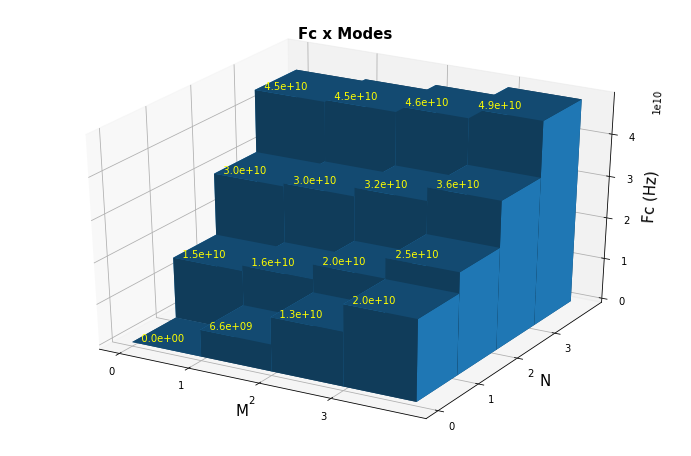

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 
from IPython.core.display import HTML
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


len_m = 4
len_n = 4

m,n = np.meshgrid(np.arange(len_m), np.arange(len_n))
cf = np.empty((len_m, len_n))

guia = RectangularWaveGuide(a=0.0228, b=0.0101)


def number_compress(number):
    return "%10.1e"%number

for i in range(len_m):
    for j in range(len_n):
        cf[i][j] = guia.findCF(m[i][j], n[i][j])
        ax.text(m[i][j], n[i][j], cf[i][j], number_compress(cf[i][j]), color='yellow')

# Plot Fc's x modes in 3d chart 
plt.xticks(range(len_m))
plt.yticks(range(len_n))
plt.title("Fc x Modes", fontweight="bold", fontsize="15")
ax.set_xlabel('M', fontsize=15)
ax.set_ylabel('N', fontsize=15)
ax.set_zlabel('Fc (Hz)', fontsize=15)

x, y, z = m.ravel(), n.ravel(), cf.ravel()

bottom = np.zeros_like(z)
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, z, alpha=1)
plt.show()    


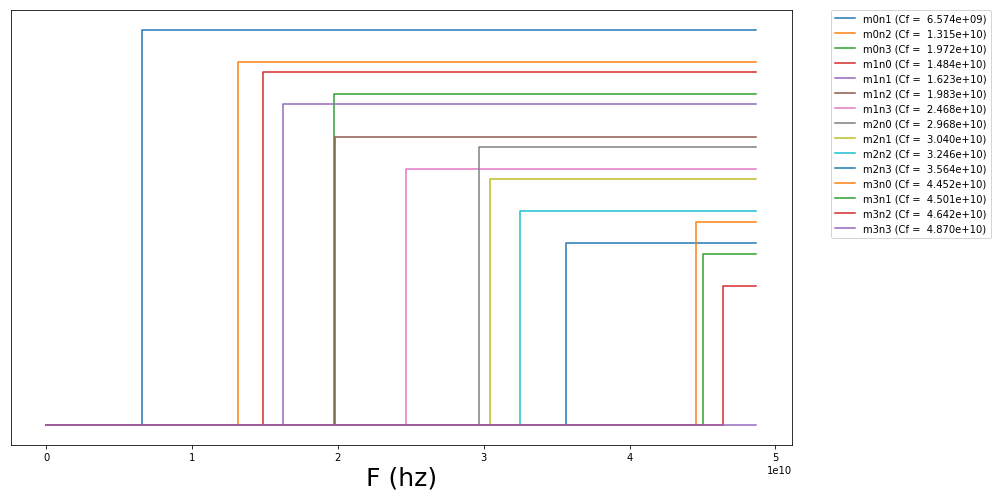

In [35]:
# Step chart 

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)


def step(f_in, y_out, cut_f):
    if f_in > cut_f: 
        return y_out 
    else:
        return 0

y_scale = 7*len_m + 3*len_n   

x2 = np.sort(np.ravel(cf))
for i, line in enumerate(cf[0:4, 0:4]): 
    for j, cut in enumerate(line): 
        if i == 0 and j == 0:
            pass
        else:
            y_value = y_scale - 7*i - 3*j
            y2 = [step(f, y_value, cut) for f in x2]
            ax.step(x2, y2, label=("m" + str(i)) + "n" + str(j) + " (Cf = %10.3e" %cut + ")")
          

ax.tick_params(axis='both', left='off', labelleft='off')
ax.set_xlabel('F (hz)', fontsize=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [4]:
# Preparing html table
html = """
     <table style="border:none">
         <tr style="border:none">
             <th style="padding:20px; border:none; background-color:#f7f7f7;">
             <center> m \ n </center> """+ """
             </th>
    """

for j in range(len_n):
    html += """<th style="padding:20px; border:none; background-color:#f7f7f7;">
             <center> %d </center> """ %j+ """
             </th>"""
html += """ </tr> """

for i in range(len_m):
    html += """<tr style="border:none">
               <td style="padding:20px; border:none; font-weight:bold;">%d</td>""" %i
    for j in range(len_n): 
        html += """<td style="padding:20px; border:none;">%10.1e Hz</td> """ %cf[i][j] 
    
    html += """</tr>"""

html += """</table>"""
HTML(html)

m \ n,0,1,2,3
0,0.0e+00 Hz,6.6e+09 Hz,1.3e+10 Hz,2.0e+10 Hz
1,1.5e+10 Hz,1.6e+10 Hz,2.0e+10 Hz,2.5e+10 Hz
2,3.0e+10 Hz,3.0e+10 Hz,3.2e+10 Hz,3.6e+10 Hz
3,4.5e+10 Hz,4.5e+10 Hz,4.6e+10 Hz,4.9e+10 Hz


<h3>Circular Waveguide</h3>
<img src="static/circular_waveguide.jpg">

<p style="text-align: justify; text-indent:4em">  The lower cutoff  wavelength for a particular TM mode in circular waveguide is determined by the following equation: 
</p>

\begin{align*} 
(\lambda_c)_{mn} = \frac{2 \pi r} {p^{'}_{mn} }\ \left [ meters \right ]	
\end{align*}

<h4>TE mode</h4>
<p style="text-align: justify; text-indent:4em">  For a particular TE mode p'mn is given by the following table 
</p>



<img src="static/pmm_table_circular_te_waveguide.jpeg">


<h4>TM mode</h4>

<p style="text-align: justify; text-indent:4em">For a particular TM mode p'mn is given by the following table: 
</p>

<img src="static/pmm_table_circular_tm_waveguide.jpg">


In [5]:
class CircularWaveGuide():
    
    pmm_te = np.matrix(
        [
            [3.832, 7.016, 10.174],
            [1.841, 5.331, 8.536], 
            [3.054, 6.706, 9.970]
        ]
    )
    pmm_tm = np.matrix(
        [
            [2.405, 5.52, 8.654],
            [3.832, 7.016, 10.174], 
            [5.135, 8.417, 11.62]
        ]
    )

    def __init__(self, propagation: str='te', r: float=None, E: float=8.854187816999999*math.pow(10, -12), 
                 U: float=1.2566370614359173 * math.pow(10, -6), S: float=299792458.011):
        """
        Constructor Class
        :param propation: te or tm propagation mode
        :param r: straight section radius (m)
        :param E: Permittivity
        :param U: Permeability
        :param S: Speed propagation
        """
        if propagation.lower() != 'te' and propagation.lower() != "tm":
            raise NameError('Invalid Propagation Mode. Valids: te or tm')
            
        self.propagation = propagation.lower()
        self.r = r
        self.E = E
        self.U = U
        self.S = S
        
    
    def setE(self, E):
        """
        Set the Permittivity
        :param E: Permittivity
        """
        self.E = E

        
    def setU(self, U):
        """
        Set the Permeability
        :param U: Permeability
        """
        self.U = U
        

    def calcS(self):
        """
        calculate speed
        """
        self.S = 1 / math.sqrt(self.U * self.E)
        
        return self.S
    
    def findCW(self, m, n): 
        """
        find the lower cutoff wavelength for a particular mode in rectangular waveguide
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        if n < 1 or n > 3 or m > 2 or m < 0: 
            raise NameError('Invalid Modes')
            
        if self.propagation == "te":
            pmm = self.pmm_te[m].item(n-1)

        elif self.propagation == "tm":
            pmm = self.pmm_tm[m].item(n-1)
        
        return (2 * math.pi * self.r) / pmm
    
    
    def findCF(self, m, n):
        """
        find the lower cutoff frequency for a particular mode in rectangular waveguide
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        if n < 1 or n > 3 or m > 2 or m < 0: 
            raise NameError('Invalid Modes')
            
        return self.S / self.findCW(m, n)


In [6]:
c_guide = CircularWaveGuide(propagation="te", r=0.02)
print("%10.3e"%c_guide.findCF(1,1))

 4.392e+09
